# Evaluation metrics

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

## Accuracy

In [2]:
l1 = (0,1,1,1,0,0,0,1)
l2 = (0,1,0,1,0,1,0,0)

In [3]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [4]:
assert true_positive(l1, l2) == 2
assert false_positive(l1, l2) == 1
assert false_negative(l1, l2) == 2
assert true_negative(l1, l2) == 3

In [5]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    # return accuracy
    # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [6]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [7]:
assert abs(accuracy(l1, l2) - metrics.accuracy_score(l1, l2)) < 1e-10
assert abs(accuracy_v2(l1, l2) - metrics.accuracy_score(l1, l2)) < 1e-10
metrics.accuracy_score(l1, l2)

0.625

## Precision

In [8]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [11]:
assert abs(precision(l1, l2) - metrics.precision_score(l1, l2)) < 1e-10
metrics.precision_score(l1, l2)

0.6666666666666666

## Recall

In [12]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [13]:
assert abs(recall(l1, l2) - metrics.recall_score(l1, l2)) < 1e-10
metrics.recall_score(l1, l2)

0.5

## Precision-recall curve

In [14]:
y_true = (0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0)

y_prob = (0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815)

In [18]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = (0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213)

# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_prob]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

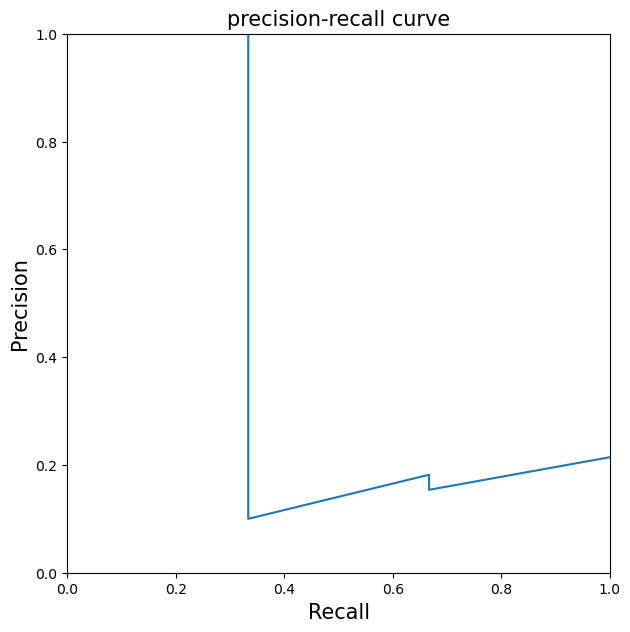

In [26]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("precision-recall curve", fontsize=15);

## F1-score

In [27]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r)
    return score

In [28]:
y_true = (0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0)

y_pred = (0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0)

In [33]:
assert abs(f1(y_true, y_pred) - metrics.f1_score(y_true, y_pred)) < 1e-10
metrics.f1_score(y_true, y_pred)

0.5714285714285714

## ROC AUC (Receiver Operating Characteristic Area Under Curve)

In [34]:
# True Positive Rate (recall, sensitivity)
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

In [35]:
# False Positive Rate
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [36]:
# True Negative Rate (specificity)
def tnr(y_true, y_pred):
    """
    Function to calculate tnr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tnr
    """
    return 1 - fpr(y_true, y_pred)

In [ ]:
# actual targets
y_true = (0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1)

# predicted probabilities of a sample being 1
y_prob = (0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99)

# handmade thresholds
thresholds = (0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0)

In [48]:
# empty lists to store tpr
# and fpr values
tpr_list = []
fpr_list = []

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_prob]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [57]:
tpr_fpr = pd.DataFrame(
    np.column_stack((thresholds, tpr_list, fpr_list)),
    columns=["threshold", "tpr", "fpr"]
)
tpr_fpr

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


In [93]:
import math
dist = []
left_top = (0, 1)
for fpr, tpr in zip(fpr_list, tpr_list):
    dist.append(math.sqrt((fpr - left_top[0])**2 + (tpr - left_top[1])**2))
idx = dist.index(min(dist))  # find minimal distance to the left-top corner
optim = tpr_fpr.iloc[idx, :]
fpr_optim, tpr_optim = optim.fpr, optim.tpr
fpr_optim, tpr_optim

(0.2, 0.8)

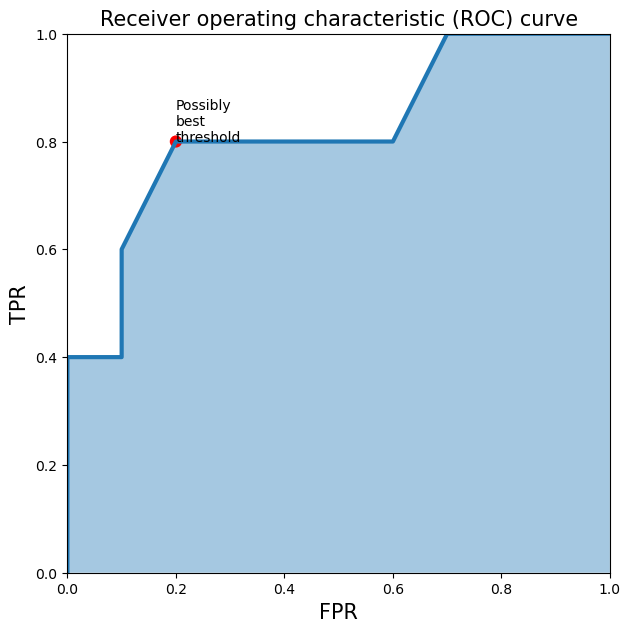

In [76]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.title("Receiver operating characteristic (ROC) curve", fontsize=15)
plt.text(fpr_optim, tpr_optim, "Possibly\nbest\nthreshold")
circle1 = plt.Circle((fpr_optim, tpr_optim), 0.01, color='r')
plt.gca().add_patch(circle1)
plt.show()

**Select the best threshold from the leftmost top point in the ROC curve**

In [51]:
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

In [54]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [58]:
tp_fp = pd.DataFrame(
    np.column_stack((thresholds, tp_list, fp_list)),
    columns=["threshold", "tp", "fp"]
)
tp_fp

,threshold,tp,fp
0,0.00,5.0,10.0
1,0.10,5.0,9.0
2,0.20,5.0,7.0
3,0.30,4.0,6.0
4,0.40,4.0,3.0
5,0.50,4.0,3.0
6,0.60,4.0,2.0
7,0.70,3.0,1.0
8,0.80,3.0,1.0
9,0.85,2.0,1.0


In [77]:
threshold = tpr_fpr.where((tpr_fpr.tpr == tpr_optim) & (tpr_fpr.fpr == fpr_optim)).dropna().threshold.to_list()[0]
threshold

0.6